# Selecting Data Phase

sample graphs of outlier removal

before


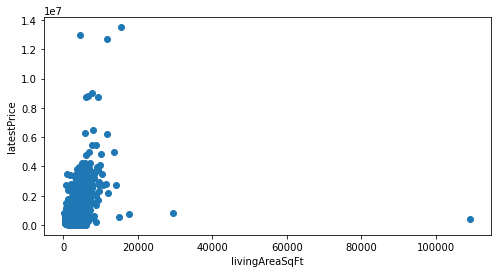

after


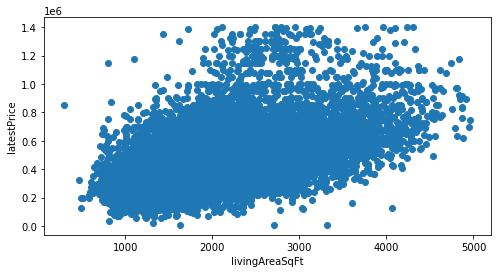

In [54]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from scipy import stats

df = pd.read_csv('austinHousingData.csv')
df_filtered = df[['livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher', 'latestPrice']]

z = np.abs(stats.zscore(df_filtered))
threshold = 2
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]

X = df_filtered_o[['livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher']]
y = df_filtered_o.latestPrice
y = y.to_numpy()

print('sample graphs of outlier removal\n')

print('before')
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_filtered['livingAreaSqFt'], df_filtered['latestPrice'])
ax.set_xlabel('livingAreaSqFt')
ax.set_ylabel('latestPrice')
plt.show()
print('after')
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_filtered_o['livingAreaSqFt'], df_filtered_o['latestPrice'])
ax.set_xlabel('livingAreaSqFt')
ax.set_ylabel('latestPrice')
plt.show()

# Training Phase

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc = MinMaxScaler()
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_trainscaled=sc.fit_transform(X_train)
X_testscaled=sc.fit_transform(X_test)
y_trainscaled=sc.fit_transform(y_train)
y_testscaled=sc.fit_transform(y_test)

print(X_trainscaled.shape)
print(y_trainscaled.shape)
print(X_testscaled.shape)
print(y_testscaled.shape)

(10041, 6)
(10041, 1)
(2511, 6)
(2511, 1)


# Modeling Phase

In [56]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_trainscaled, y_trainscaled, epochs=20, batch_size=10)

_, accuracy = model.evaluate(X_testscaled, y_testscaled)
print('Accuracy: %.2f' % (accuracy*100))

y_trainscaled_pred = model.predict(X_trainscaled)
y_testscaled_pred = model.predict(X_testscaled)

mse_train = mean_squared_error(y_trainscaled,y_trainscaled_pred)
mse_test = mean_squared_error(y_testscaled,y_testscaled_pred)
print("Training MSE = ", mse_train)
print("Testing MSE = ", mse_test)

Epoch 1/20
1005/1005 [==============================] - 1s 1ms/step - loss: 0.0204 - accuracy: 9.9592e-05
Epoch 2/20
1005/1005 [==============================] - 1s 1ms/step - loss: 0.0152 - accuracy: 1.9918e-04
Epoch 3/20
1005/1005 [==============================] - 1s 739us/step - loss: 0.0148 - accuracy: 2.9878e-04
Epoch 4/20
1005/1005 [==============================] - 1s 761us/step - loss: 0.0145 - accuracy: 1.9918e-04
Epoch 5/20
1005/1005 [==============================] - 1s 762us/step - loss: 0.0143 - accuracy: 2.9878e-04
Epoch 6/20
1005/1005 [==============================] - 1s 773us/step - loss: 0.0142 - accuracy: 1.9918e-04
Epoch 7/20
1005/1005 [==============================] - 1s 760us/step - loss: 0.0141 - accuracy: 2.9878e-04
Epoch 8/20
1005/1005 [==============================] - 1s 641us/step - loss: 0.0140 - accuracy: 1.9918e-04
Epoch 9/20
1005/1005 [==============================] - 1s 644us/step - loss: 0.0139 - accuracy: 2.9878e-04
Epoch 10/20
1005/1005 [=========